In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import t, f, multivariate_normal, norm
import numpy as np
import statsmodels.api as sm
from Linear_Reg_Diagnostic import Linear_Reg_Diagnostic
import statsmodels.stats.outliers_influence as smoi
from statsmodels.graphics.api import interaction_plot, qqplot
from statsmodels.stats.anova import anova_lm


In [2]:
fever = pd.read_csv("http://stats191.stanford.edu/data/hayfever.table",  delim_whitespace=True, index_col='id')


In [3]:
fever.head()

,hours,A,B
id,,,
1,2.9,1,1
2,2.3,1,1
3,2.3,1,1
4,2.5,1,1
1,4.6,1,2


In [4]:
fit_model = sm.OLS.from_formula('hours ~ C(A) + C(B) + C(A):C(B)', fever).fit()
print(fit_model.summary())

                            OLS Regression Results                            
Dep. Variable:                  hours   R-squared:                       0.972
Model:                            OLS   Adj. R-squared:                  0.964
Method:                 Least Squares   F-statistic:                     119.3
Date:                Tue, 16 May 2023   Prob (F-statistic):           4.91e-19
Time:                        11:22:33   Log-Likelihood:                -31.145
No. Observations:                  36   AIC:                             80.29
Df Residuals:                      27   BIC:                             94.54
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               2.5000    

In [5]:
fit_model.predict(exog={'A': [2], 'B': [1]})

0    5.375
dtype: float64

sol 2:

In [6]:
resid = fit_model.get_influence().resid_studentized_external

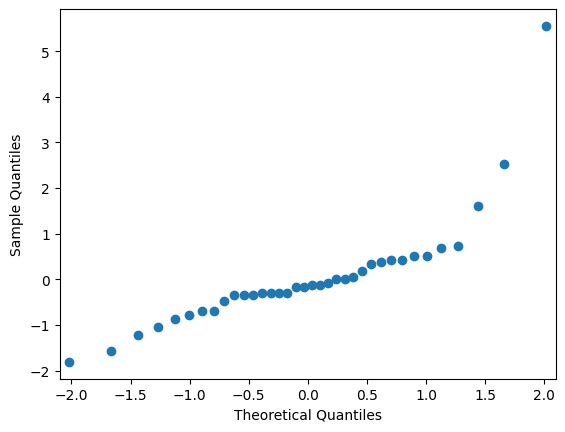

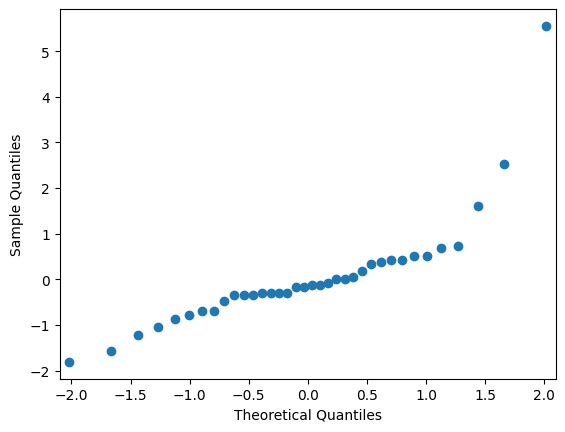

In [7]:
qqplot(resid, dist=t(26))

yes, there are violations in normality.

In [8]:
fever = fever.reset_index()

sol 3:

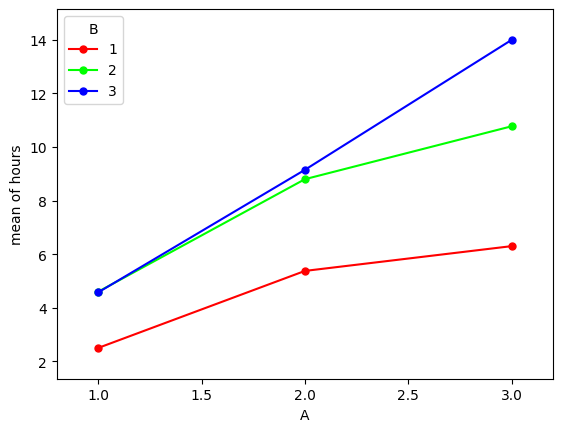

In [9]:
fig = interaction_plot(fever['A'], fever['B'], fever['hours'], ms=10)

There appear to be interactions.

sol 4: (three ways)

In [10]:
r_model = sm.OLS.from_formula('hours ~ C(A) + C(B)', fever).fit()

In [11]:
table = anova_lm(r_model, fit_model)
print(table)

   df_resid        ssr  df_diff    ss_diff          F        Pr(>F)
0      31.0  46.294167      0.0        NaN        NaN           NaN
1      27.0  11.892500      4.0  34.401667  19.525857  1.186415e-07


In [12]:
fit_model.f_test("C(A)[T.2]:C(B)[T.2] = C(A)[T.3]:C(B)[T.2] = C(A)[T.2]:C(B)[T.3] = C(A)[T.3]:C(B)[T.3] = 0")

<class 'statsmodels.stats.contrast.ContrastResults'>
<F test: F=19.52585663233128, p=1.186415371297993e-07, df_denom=27, df_num=4>

In [13]:
table = anova_lm(fit_model)
print(table)

             df      sum_sq     mean_sq           F        PR(>F)
C(A)        2.0  254.286667  127.143333  288.658398  5.974999e-19
C(B)        2.0  131.646667   65.823333  149.441244  2.495094e-15
C(A):C(B)   4.0   34.401667    8.600417   19.525857  1.186415e-07
Residual   27.0   11.892500    0.440463         NaN           NaN


we can see that there is a connection (p_val < 0.05)

sol 5:

In [14]:
fit_model.f_test("C(B)[T.2] = C(B)[T.3] = C(A)[T.2] = C(A)[T.3] = 0")

<class 'statsmodels.stats.contrast.ContrastResults'>
<F test: F=17.8828883750263, p=2.777121333462073e-07, df_denom=27, df_num=4>

There is significence to the main effects.